In [127]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,                    
)

problem_name = ""

loss_value = .6  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 1000
Experiment folders:  ['model_40_data_10', 'model_0_data_10', 'model_22_data_10', 'model_32_data_10', 'model_14_data_10', 'model_49_data_10', 'model_9_data_10', 'model_15_data_10', 'model_8_data_10', 'model_48_data_10', 'model_1_data_10', 'model_41_data_10', 'model_33_data_10', 'model_23_data_10', 'model_17_data_10', 'model_38_data_10', 'model_28_data_10', 'model_21_data_10', 'model_31_data_10', 'model_3_data_10', 'model_43_data_10', 'model_30_data_10', 'model_20_data_10', 'model_42_data_10', 'model_2_data_10', 'model_16_data_10', 'model_29_data_10', 'model_39_data_10', 'model_13_data_10', 'model_25_data_10', 'model_35_data_10', 'model_47_data_10', 'model_7_data_10', 'model_34_data_10', 'model_24_data_10', 'model_6_data_10', 'model_46_data_10', 'model_12_data_10', 'model_4_data_10', 'model_44_data_10', 'model_26_data_10', 'model_36_data_10', 'model_19_data_10', 'model_10_data_10', 'model_11_data_10', 'model_45_data_10', 'model_5_data_10', 'mo

In [128]:
# Preparation for the specific plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
other_label = "Minima (Larger Datasets)"

Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
Collected results for 36 experiments
⚠️ Skipped model_40_data_10 (target=0): Model_0: loss curve never exceeds threshold=0.6
⚠️ Skipped model_0_data_10 (target=0): Model_0: loss curve never exceeds threshold=0.6
⚠️ Skipped model_22_data_10 (target=0): Model_0: loss curve never exceeds threshold=0.6
⚠️ Skipped model_32_data_10 (target=0): Model_0: loss curve never exceeds threshold=0.6
⚠️ Skipped model_14_data_10 (target=0): Model_0: loss curve never exceeds threshold=0.6
⚠️ Skipped model_49_data_10 (target=0): Model_0: loss curve never exceeds threshold=0.6
⚠️ Skipped model_9_data_10 (target=0): Model_0: loss curve never exceeds threshold=0.6
⚠️ Skipped model_15_data_10 (target=0): Model_0: loss curve never exceeds threshold=0.6
⚠️

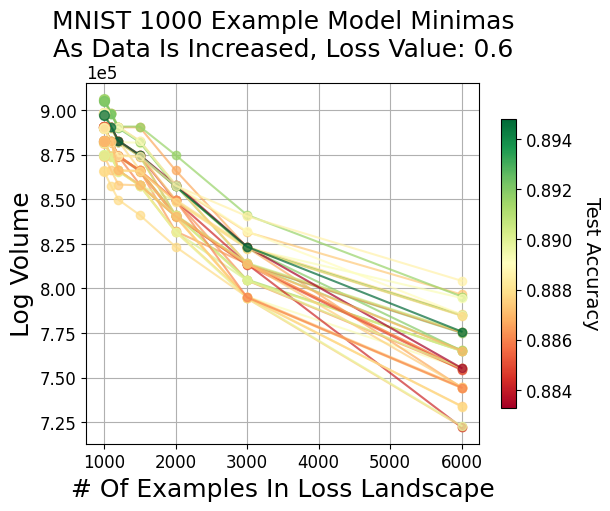

In [129]:
# For the poisoning experiments, this plot has no meaning

labels = varying_landscape_minima_labels(
    data_modification_folder=data_modifications[0], # Random choice to grab datatype from
    base_train_size=base_train_size,
)

results_dict = model_volume_across_targets(
    target_model_data_levels=model_data_sizes,
    loss_value=loss_value,
    experiment_folders=experiment_folders
)
results_with_cutoff = append_cutoff_points(results_dict, threshold=loss_value, base_dir=".")

found_minima_vol, found_minima_dataset = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],        
    base_train_size=base_train_size, 
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    suptitle=f"{problem_name}",
    title=f"MNIST 1000 Example Model Minimas\nAs Data Is Increased, Loss Value: {loss_value}",
    log_scale = data_level_log,
    alpha=0.7,
    plot_average=False,
    plot_only_average=False,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels",
    xlabel_size=18, ylabel_size=18, title_size=18, suptitle_size=18, legend_size=14, legend_title_fontsize=14,
    plot_accuracy_colors=True,
    plot_only_add_train_level=0,
)